(applying-erk-methods-to-solve-ivps-section)=

# Solving initial value problems using explicit Runge-Kutta methods

Recall that the [general form of an explicit Runge-Kutta method](general-form-of-a-RK-method-section) is

$$ \begin{align*}
    y_{n+1} &= y_n + h(b_1k_1 + b_2k_2 + \cdots + b_sk_s), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + c_2h, y_n + ha_{21}k_1), \\
    k_3 &= f(t_n + c_3h, y_n + h(a_{31}k_1 + a_{32}k_2), \\
    &\vdots \\
    k_s &= f(t_n + c_sh, y_n + h(a_{s1}k_1 + a_{s2}k_2 + \cdots + a_{s,s-1}k_{s-1}).
\end{align*} $$

To apply the an explicit Runge-Kutta method to solve an initial value problem we calculate the stage values $k_1, k_2, \dots, k_s$ using the known values of $t_n$ and $y_n$ and the step length $h$. Then the solution over one step $y_{n+1}$ is then calculated using $k_1, k_2, \ldots, k_s$.

```{prf:algorithm} Solving an IVP using an explicit Runge-Kutta method
**Inputs** A first-order ODE of the form $y' = f(t,y)$, a domain $t \in [t_0, t_{\max}]$, an initial value $y(t_0) = y_0$ and a step length $h$

**Outputs** $(t_0, t_1, \ldots)$ and $(y_0, y_1, \ldots)$

- $nsteps \gets \operatorname{int}\left( \dfrac{b - a}{h} \right)$
- For $n = 0, \ldots, nsteps$
  - For $i = 1, \ldots, s$
    - $k_i \gets f(t_n + c_i h, y_n + h (a_{i1}k_1 + a_{i2}k_2 + \cdots + a_{i,i-1}k_{i-1}))$
  - $y_{n+1} \gets y_n + h (b_1k_1 + b_2k_2 + \cdots + b_sk_s)$
- Return $(t_0, t_1, \ldots)$ and $(y_0, y_1, \ldots)$
```

`````{prf:example}
:label: rk4-example

Calculate the solution to the following initial value problem using the {prf:ref}`RK4 method<rk4-definition>` with $h = 0.2$

\begin{align*}
    y'=ty, \qquad t\in [0,1], \qquad y(0)=1.
\end{align*}

````{dropdown} Solution (click to show)

Here the ODE function is $f(t, y)=ty$, $t_0 = 0$, $y_0 = 1$ and $h = 0.2$. First, we calculate the number of steps required

$$nsteps = \operatorname{int} \left( \frac{t_{\max} - t_0}{h} \right) = \operatorname{int} \left( \frac{1 - 0}{0.2} \right) = 5.$$

The RK4 method is

$$ \begin{align*}
    y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{2}h, y_n + \tfrac{1}{2}hk_1), \\
    k_3 &= f(t_n + \tfrac{1}{2}h, y_n + \tfrac{1}{2}hk_2), \\
    k_4 &= f(t_n + h, y_n + hk_3).
\end{align*} $$

Calculating the stage values for the first step

$$ \begin{align*}
    k_1 &= f(t_0, y_0)
    = t_0 y_0 \\
    &= (0)(1) = 0, \\
    k_2 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2}hk_1) 
    = (t_0 + \tfrac{1}{2}h)(y_0 + \tfrac{1}{2}hk_1) \\
    &= (0 + \tfrac{1}{2}(0.2))(1 + \tfrac{1}{2}(0.2)(0)) = 0.1, \\
    k_3 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2}hk_2)
    = (t_0 + \tfrac{1}{2}h)(y_0 + \tfrac{1}{2}hk_2) \\
    &= (0 + \tfrac{1}{2}(0.2))(1 + \tfrac{1}{2}(0.2)(0.1)) = 0.101, \\
    k_4 &= f(t_0 + h, y_0 + hk_2) 
    = (t_0 + h)(y_0 + hk_2) \\
    &= (0 + 0.2)(1 + 0.2(0.1)) = 0.204.
\end{align*} $$

The solution at the first step is

$$ \begin{align*}
    y_1 &= y_0 + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) \\
    &= 1 + \frac{0.2}{6}(0 + 2(0.1) + 2(0.101) + 0.204040) = 1.020201, \\
    t_1 &= t_0 + h = 0 + 0.2 = 0.2,
\end{align*} $$

Repeating this for the other steps in the method gives the values in the table below.

| $n$ | $t_n$ | $y_n$ | $k_1$ | $k_2$ | $k_3$ | $k_4$ |
|:--:|:---:|:--------:|:--------:|:--------:|:--------:|:--------:|
|  0 | 0.0 | 1.000000 |    -     |    -     |    -     |    -     |
|  1 | 0.2 | 1.020201 | 0.000000 | 0.100000 | 0.101000 | 0.204040 |
|  2 | 0.4 | 1.083287 | 0.204040 | 0.312182 | 0.315426 | 0.433315 |
|  3 | 0.6 | 1.197217 | 0.433315 | 0.563309 | 0.569809 | 0.718349 |
|  4 | 0.8 | 1.377126 | 0.718330 | 0.888335 | 0.900235 | 1.101811 |
|  5 | 1.0 | 1.648717 | 1.101701 | 1.338567 | 1.359885 | 1.649103 |
````
`````

(rk4-code-section)=

--- 

## Code

The code below defines a function called `rk4()` which computes the solution to an IVP.

`````{tab-set}
````{tab-item} Python
```python
def rk4(f, tspan, y0, h):

    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    if (type(y0) is list):
            y = np.zeros((nsteps + 1, len(y0)))
    else:
        y = np.zeros((nsteps + 1, 1))

    t[0] = tspan[0]
    y[0,:] = y0

    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4);
        t[n+1] = t[n] + h

    return t, y
```

<iframe width="560" height="315" src="https://www.youtube.com/embed/jrMzo5REU9g?si=rKYcuSC_6Z1_XoWH" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
````

````{tab-item} MATLAB
```matlab
function [t, y] = rk4(f, tspan, y0, h)

nsteps = floor((tspan(2) - tspan(1)) / h);
t = zeros(nsteps + 1);
if length(y0) > 1
    y = zeros(length(t), length(y0));
else
    y = zeros(length(t), 1);
end
y(1, :) = y0;

for n = 1 : length(t) - 1
    k1 = f(t(n), y(n, :));
    k2 = f(t(n) + 1/2 * h, y(n, :) + 1/2 * h * k1);
    k3 = f(t(n) + 1/2 * h, y(n, :) + 1/2 * h * k2);
    k4 = f(t(n) + h, y(n, :) + h * k3);
    y(n+1, :) = y(n, :) + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4);
    t(n+1, :) = t(n) + h;
end

end
```
<iframe width="560" height="315" src="https://www.youtube.com/embed/cXemDaA6jAM?si=Uz1FRgCeRGiEnZaE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
````
`````

The `rk4()` function has been used to solve the IVP from {prf:ref}`rk4-example` which is shown in {numref}`rk4-example-plot`.

```{glue:figure} rk4_example_plot
:name: rk4-example-plot
:figwidth: 600

The solution to the IVP $y'=ty$, $t \in [0,1]$, $y(0)=1$ using the RK4 method with $h=0.2$.
```

|  t   |     y     |   Exact   |
|:----:|:---------:|:---------:|
| 0.00 |  1.000000 |  1.000000 |
| 0.20 |  1.020201 |  1.020201 |
| 0.40 |  1.083287 |  1.083287 |
| 0.60 |  1.197217 |  1.197217 |
| 0.80 |  1.377126 |  1.377128 |
| 1.00 |  1.648717 |  1.648721 |


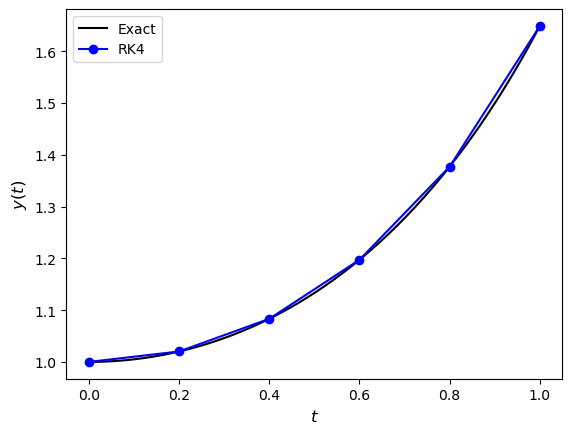

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define RK4 method function
def rk4(f, tspan, y0, h):
    
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    if (type(y0) is list):
            y = np.zeros((nsteps + 1, len(y0)))
    else:
        y = np.zeros((nsteps + 1, 1))
        
    t[0] = tspan[0]
    y[0,:] = y0

    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4);
        t[n+1] = t[n] + h

    return t, y


# Define the ODE function and exact solution
def f(t, y):
    return t * y

def exact(t):
    return np.exp(t ** 2 / 2)

# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = rk4(f, tspan, y0, h)

# Print table of solution values
print("|  t   |     y     |   Exact   |")
print("|:----:|:---------:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} | {exact(t[n]):9.6f} |")
    
# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="RK4")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y(t)$", fontsize=12)
plt.legend()
plt.show()

from myst_nb import glue
glue("rk4_example_plot", fig, display=False)

## Comparison of first, second and fourth-order solutions

The first-order Euler, RK2 and RK4 method solutions to the IVP from {prf:ref}`rk4-example` have been plotted against the exact solution in {numref}`euler-rk2-rk4-figure`.

```{glue:figure} euler_rk2_rk4_plot
:name: euler-rk2-rk4-figure
:figwidth: 600

Comparisons between the Euler method, Heun's method and the RK4 method for solving the IVP $y'=ty$, $t \in [0,1]$, $y(0)=1$ with $h=0.2$
```

Here we see that the second-order and fourth-order method are significantly more accurate than the first-order method. However, in this plot it is difficult to see the difference between the second and fourth-order solutions. 

|  t   |   Euler   |    RK2    |    RK4    |   Exact   |
|:----:|:---------:|:---------:|:---------:|:---------:|
| 0.00 |  1.000000 |  1.000000 |  1.000000 |  1.000000 |
| 0.20 |  1.000000 |  1.020000 |  1.020201 |  1.020201 |
| 0.40 |  1.040000 |  1.082832 |  1.083287 |  1.083287 |
| 0.60 |  1.123200 |  1.196313 |  1.197217 |  1.197217 |
| 0.80 |  1.257984 |  1.375281 |  1.377126 |  1.377128 |
| 1.00 |  1.459261 |  1.644836 |  1.648717 |  1.648721 |


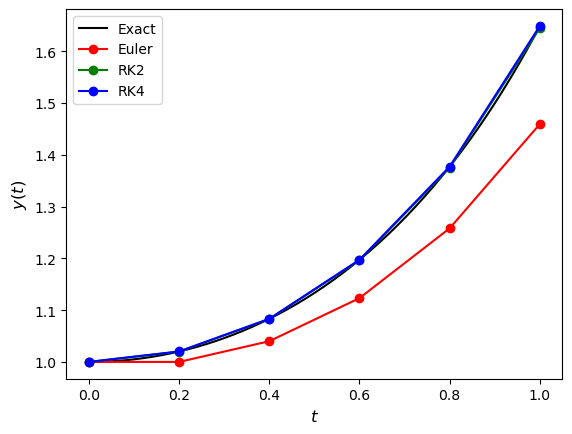

In [3]:
def euler(f, tspan, y0, h):
    
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    if (type(y0) is list):
            y = np.zeros((nsteps + 1, len(y0)))
    else:
        y = np.zeros((nsteps + 1, 1))
        
    t[0] = tspan[0]
    y[0,:] = y0

    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h

    return t, y


def rk2(f, tspan, y0, h):

    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    if (type(y0) is list):
            y = np.zeros((nsteps + 1, len(y0)))
    else:
        y = np.zeros((nsteps + 1, 1))

    t[0] = tspan[0]
    y[0,:] = y0

    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        t[n+1] = t[n] + h

    return t, y


# Define the ODE function and exact solution
def f(t, y):
    return t * y


def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

# Calculate the solution to the IVP
t, yeuler = euler(f, tspan, y0, h)
t, yrk2 = rk2(f, tspan, y0, h)
t, yrk4 = rk4(f, tspan, y0, h)
yexact = exact(t);

print("|  t   |   Euler   |    RK2    |    RK4    |   Exact   |")
print("|:----:|:---------:|:---------:|:---------:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {yeuler[n,0]:9.6f} | {yrk2[n,0]:9.6f} | {yrk4[n,0]:9.6f} | {yexact[n]:9.6f} |")
    
# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, yeuler, "ro-", label="Euler")
plt.plot(t, yrk2, "go-", label="RK2")
plt.plot(t, yrk4, "bo-", label="RK4")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y(t)$", fontsize=12)
plt.legend()

from myst_nb import glue
glue("euler_rk2_rk4_plot", fig, display=False)

We can compare the accuracy of different methods by computing the solutions for over different values of the step length and calculate the global truncation errors for a point in the domain. The three methods have been applied to solve the IVP from {prf:ref}`rk4-example` using step lengths $h = 0.2, 0.1, 0.05, 0.025$ and the global truncation error at $t = 1$ has been calculated and tabulated below.

|  $h$  |  Euler   |   RK2    |    RK4   |
|:-----:|:--------:|:--------:|:--------:|
| 0.200 | 1.89e-01 | 3.88e-03 | 4.59e-06 |
| 0.100 | 1.02e-01 | 8.40e-04 | 2.64e-07 |
| 0.050 | 5.28e-02 | 1.92e-04 | 1.55e-08 |
| 0.025 | 2.69e-02 | 4.55e-05 | 9.33e-10 |


We have seen in [chapter 1](error-analysis-section) that as the step lengths $h$ decrease, the errors in the Euler method decrease in a linear fashion, i.e., $E_n = O(h)$, i.e., first-order accurate. We expect that the RK2 method and the RK4 method will have errors $O(h^2)$ and $O(h^4)$ respectively. By the definition of $O(h^n)$ the global truncation error should approximate $h^n$. Applying logarithms to both sides gives

$$ \begin{align*}
    E_n &= h^n \\
    \log(E_n) &= n\log(h).
\end{align*} $$

This is a linear function where the slope of $\log(E_n)$ has a gradient of $n$. The global truncation errors for the three methods have been plotted on a loglog scale in {numref}`rk4-example-hvals-log-plot`

```{glue:figure} rk4_example_hvals_log_plot
:name: rk4-example-hvals-log-plot
:figwidth: 600

Plots of the the global truncation errors for the Euler method, the RK2 method and the RK4 method on a loglog scale.
```

The loglog plots of the global truncation errors are linear functions where we can clearly see the distinction between the errors for the three methods. The order of the methods $n$ can be approximated using 

$$ n \approx \frac{\log(E_n(h_1) - \log(E_n(h_2))}{\log(h_1) - \log(h_2)}, $$(n-approx-equation)

where $h_1 > h_2$. Using the values from {numref}`rk4-example-hvals-table` 

$$ \begin{align*}
  \text{Euler}: && n & \approx \frac{\log(1.89\times 10^{-1}) - \log(2.69\times 10^{-2})}{\log(0.2) - \log(0.025)} = 0.94 \approx 1, \\
  \text{RK2}: && n & \approx \frac{\log(3.88 \times 10^{-3}) - \log(4.55 \times 10^{-5})}{\log(0.2) - \log(0.025)} = 2.14 \approx 2, \\
  \text{RK4}: && n & \approx \frac{\log(4.59 \times 10^{-6}) - \log(9.33 \times 10^{-10})}{\log(0.2) - \log(0.025)} = 4.09 \approx 4,
\end{align*} $$

which confirm the order of accuracy of the three methods.

|  $h$  |  Euler   |   RK2    |    RK4   |
|:-----:|:--------:|:--------:|:--------:|
| 0.200 | 1.89e-01 | 3.88e-03 | 4.59e-06 |
| 0.100 | 1.02e-01 | 8.40e-04 | 2.64e-07 |
| 0.050 | 5.28e-02 | 1.92e-04 | 1.55e-08 |
| 0.025 | 2.69e-02 | 4.55e-05 | 9.33e-10 |


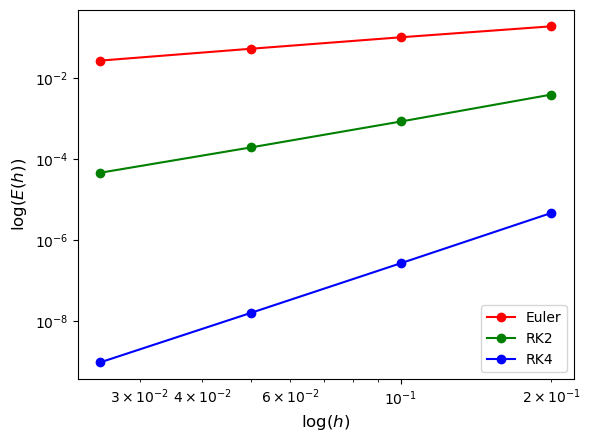

In [13]:
# Calculate solution for decreasing step lengths
hvals = [0.2, 0.1, 0.05, 0.025]
tval = 1
E_euler, E_rk2, E_rk4 = [], [], []
for h in hvals:
    t, y_euler = euler(f, tspan, y0, h)
    t, y_rk2 = rk2(f, tspan, y0, h)
    t, y_rk4 = rk4(f, tspan, y0, h)
    idx = np.argmin(abs(t - tval))
    E_euler.append(abs(exact(tval) - y_euler[idx,0]))
    E_rk2.append(abs(exact(tval) - y_rk2[idx,0]))
    E_rk4.append(abs(exact(tval) - y_rk4[idx,0]))

# Print table of solution values
print("|  $h$  |  Euler   |   RK2    |    RK4   |")
print("|:-----:|:--------:|:--------:|:--------:|")
for i in range(len(hvals)):
    print(f"| {hvals[i]:0.3f} | {E_euler[i]:0.2e} | {E_rk2[i]:0.2e} | {E_rk4[i]:0.2e} |") 


# Plot errors on a log scale
fig, ax = plt.subplots()
plt.loglog(hvals, E_euler, 'ro-', label="Euler")
plt.loglog(hvals, E_rk2, 'go-', label="RK2")
plt.loglog(hvals, E_rk4, 'bo-', label="RK4")
plt.xlabel(r"$\log(h)$", fontsize=12)
plt.ylabel(r"$\log(E_n)$", fontsize=12)
plt.legend()
plt.show()

glue("rk4_example_hvals_log_plot", fig, display=False)

<!-- ## Python code

The Python code used to produce {numref}`rk4-example-hvals-table` and {numref}`rk4-example-hvals-log-plot` is given below. -->

<!-- ## MATLAB code

MATLAB code used to produce {numref}`rk4-example-hvals-table` and {numref}`rk4-example-hvals-log-plot` is given below.

```matlab
% Calculate solution for decreasing step lengths
hvals = [0.2, 0.1, 0.05, 0.025];
E_euler = [];
E_heun = [];
E_rk4 = [];
for h = hvals
    [t, y_euler] = euler(f, tspan, y0, h);
    [t, y_heun] = heun(f, tspan, y0, h);
    [t, y_rk4] = rk4(f, tspan, y0, h);
    E_euler = [E_euler, abs(exact(t(end)) - y_euler(end))];
    E_heun = [E_heun, abs(exact(t(end)) - y_heun(end))];
    E_rk4 = [E_rk4, abs(exact(t(end)) - y_rk4(end))];
end

% Output table of errors (for loop is used to group print statements)
for i = 1 : 1
    fprintf('|   t   |   Euler  |   Heun   |   RK4    |')
    fprintf('|:-----:|:--------:|:--------:|:--------:|');
    for n = 1 : length(hvals)
        fprintf('\n| %1.3f | %1.2e | %1.2e | %1.2e |', hvals (n), E_euler(n), E_heun(n), E_rk4(n))
    end
end

% Plot errors on a loglog scale
loglog(hvals, E_euler, 'ro-', MarkerFaceColor='r', LineWidth=1)
hold on
loglog(hvals, E_heun, 'go-', MarkerFaceColor='g', LineWidth=1)
loglog(hvals, E_rk4, 'bo-', MarkerFaceColor='b', LineWidth=1)
hold off
axis padded
xlabel('$\log(h)$', FontSize=14, Interpreter='latex')
ylabel('$\log(E_n)$', FontSize=14, Interpreter='latex')
legend('Euler', 'Heun', 'RK4', Location='southeast', FontSize=12)
``` -->